In [97]:
import pandas as pd
import numpy as np

In [98]:
maskmandate1 = pd.read_csv('https://raw.githubusercontent.com/peterger8y/Covid-info/main/maskmandate.csv')

In [99]:
maskmandate1['Requirement Date'] = pd.to_datetime(maskmandate1['Requirement Date'], infer_datetime_format=True)

In [100]:
dfhere = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')

dfhere.head()

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-01-11,Autauga,Alabama,1001.0,4902,55.0,4347.0,48.0,555.0,7.0
1,2021-01-11,Baldwin,Alabama,1003.0,15417,173.0,11212.0,125.0,4205.0,48.0
2,2021-01-11,Barbour,Alabama,1005.0,1663,35.0,953.0,28.0,710.0,7.0
3,2021-01-11,Bibb,Alabama,1007.0,2060,48.0,1711.0,28.0,349.0,20.0
4,2021-01-11,Blount,Alabama,1009.0,5080,77.0,3870.0,68.0,1210.0,9.0


In [101]:
exon = pd.read_csv('https://raw.githubusercontent.com/peterger8y/Covid-info/main/finalizederest.csv')

In [102]:
gabba = []
for x in dfhere['county']:
  x = x.split()
  if x[-1] == 'Area':
    x.pop()
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Borough':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Municipality':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'city':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Parish':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  else:
    x = ' '.join(x)
    gabba.append(x)


In [103]:
dfhere['county'] = gabba

In [104]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [105]:
gabba = []

for x in dfhere['state']:
  gabba.append(us_state_abbrev[x])

dfhere['state'] = gabba

In [106]:
gabba = []

for x in dfhere['county']:
  x = x.split()
  if x[-1] == 'and':
    x.pop()
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  else:
    x = ' '.join(x)
    gabba.append(x)

dfhere['county'] = gabba
gabba

['Autauga',
 'Baldwin',
 'Barbour',
 'Bibb',
 'Blount',
 'Bullock',
 'Butler',
 'Calhoun',
 'Chambers',
 'Cherokee',
 'Chilton',
 'Choctaw',
 'Clarke',
 'Clay',
 'Cleburne',
 'Coffee',
 'Colbert',
 'Conecuh',
 'Coosa',
 'Covington',
 'Crenshaw',
 'Cullman',
 'Dale',
 'Dallas',
 'DeKalb',
 'Elmore',
 'Escambia',
 'Etowah',
 'Fayette',
 'Franklin',
 'Geneva',
 'Greene',
 'Hale',
 'Henry',
 'Houston',
 'Jackson',
 'Jefferson',
 'Lamar',
 'Lauderdale',
 'Lawrence',
 'Lee',
 'Limestone',
 'Lowndes',
 'Macon',
 'Madison',
 'Marengo',
 'Marion',
 'Marshall',
 'Mobile',
 'Monroe',
 'Montgomery',
 'Morgan',
 'Perry',
 'Pickens',
 'Pike',
 'Randolph',
 'Russell',
 'Shelby',
 'St. Clair',
 'Sumter',
 'Talladega',
 'Tallapoosa',
 'Tuscaloosa',
 'Walker',
 'Washington',
 'Wilcox',
 'Winston',
 'Aleutians East',
 'Aleutians West',
 'Anchorage',
 'Bethel',
 'Bristol Bay',
 'Denali',
 'Dillingham',
 'Fairbanks North Star',
 'Haines',
 'Juneau',
 'Kenai Peninsula',
 'Ketchikan Gateway',
 'Kodiak Island

In [107]:
dfhere['county'][1872] = 'New York'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
dfhere['CTYNAME'] = dfhere['county'] + ', ' + dfhere['state']

In [109]:
dfhere.sort_values(by = 'CTYNAME', inplace=True)

In [110]:
exon.sort_values(by = 'CTYNAME', inplace=True, ignore_index=True)

In [111]:
exon['POPESTIMATE'][219] = 1147532

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
exon['POPESTIMATE'][2653] = 998684

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
DFTEST = pd.merge(exon, dfhere, on='CTYNAME', how='outer', indicator=True)

In [114]:
DFTEST['date_y'].value_counts()

2021-01-11    3257
Name: date_y, dtype: int64

In [115]:
X = DFTEST['_merge'] == 'right_only'

y = DFTEST[X].index

In [116]:
DFTEST.drop(labels=y, axis=0, inplace=True)

In [117]:
x = ['date_x', 'state_x',	'fips_x',	'cases_x', 'deaths_x',	'confirmed_cases_x',	'confirmed_deaths_x',	'probable_cases_x',	'probable_deaths_x']

DFTEST.drop(labels=x, axis=1, inplace=True)

In [118]:
x = DFTEST['CTYNAME'].duplicated()

DFTEST[x]

Y = [123, 124, 895, 896, 976, 977, 2432, 2419, 2663, 2665]

DFTEST.drop(labels = Y, axis=0, inplace=True)

In [119]:
DFTEST.rename(columns={'county state_y':'county state',	'fips_y':'fips', 'cases_y':'cases',	'deaths_y':'deaths',	'confirmed_cases_y':'confirmed_cases', 'confirmed_deaths_y':'confirmed_deaths',	'probable_cases_y':'probable_cases',	'probable_deaths_y':'probable_deaths'}, inplace=True)

In [120]:
x = DFTEST['CTYNAME'].duplicated()

DFTEST[x]

y = [2417, 2434]

In [121]:
DFTEST.drop(labels=y, axis=0, inplace=True)

In [122]:
DFTEST['Landarea'] = DFTEST['Landarea'].astype(float)

In [123]:
DFTEST['popdensity'] = DFTEST['POPESTIMATE']/DFTEST['Landarea']

In [124]:
dftest = DFTEST

In [125]:
def sambda(x):
  s=[]  
  for j, y in enumerate(x['cases']):
    if j == 0:
      s.append(0)
      h = y
    else:
      z = y - h
      s.append(z)
      h = y
  return s




In [126]:
dftimed = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [127]:
gabba = []
for x in dftimed['county']:
  x = x.split()
  if x[-1] == 'city':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'City':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  else:
    x = ' '.join(x)
    gabba.append(x)
dftimed['county'] = gabba

In [128]:
galla = []
for x in dftimed['state']:
  galla.append(us_state_abbrev[x])

dftimed['state'] = galla

In [129]:
dftimed['CTYNAME'] = dftimed['county'] + ', ' + dftimed['state']

In [130]:
a = dftimed['fips'].value_counts()
b = a.index

In [131]:
r = dftimed['date'].value_counts()
s = dftimed.index


In [132]:
for m, x in enumerate(b):
  y = dftimed['fips'] == x
  z = dftimed[y]
  z['date'] = pd.to_datetime(z['date'], infer_datetime_format=True)
  z.sort_values(by='date', inplace=True)
  c = sambda(z)
  z['casegrowth'] = c
  if m == 0:
    dftimed111 = pd.DataFrame(data=z)
  else:
    dftimed111 = pd.concat([dftimed111, z], ignore_index=True)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

In [133]:
a = maskmandate1['State.'].value_counts()
u = a.index
u

Index(['MN', 'AL', 'WI', 'TX', 'OR', 'WA', 'WV', 'MT', 'LA', 'NV', 'CA', 'AR',
       'NC', 'VT', 'VA', 'IN', 'OH', 'KY', 'CO'],
      dtype='object')

In [134]:
import datetime
from datetime import timedelta
dftimed111['date'] = pd.to_datetime(dftimed111['date'], infer_datetime_format=True)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s21 = []
s22 = []
s23 = []
s24 = []
for x in u:
  o = maskmandate1['State.'] == x
  p = maskmandate1[o]
  q = p['Requirement Date']
  q = list(q)
  q = q[0]
  da0 = q - datetime.timedelta(30)
  da1 = q - datetime.timedelta(1)
  da3 = q - datetime.timedelta(60)
  da4 = q - datetime.timedelta(90)
  da41 = q + datetime.timedelta(1)
  da5 = q + datetime.timedelta(30)
  da6 = q - datetime.timedelta(120)
  q = q - datetime.timedelta(0)
  a = dftimed111['state'] == x
  y = dftimed111[a]
  pq = y['county'].value_counts()
  pq = pq.index
  for r in pq:
    m = y['county'] == r
    pi = y[m].sort_values(by='date')
    pi.index = pi['date']
    ffa = str(q)
    ffa = ffa.split()
    ffa = ffa[0]
    pi['date'] = pd.to_datetime(pi['date'], infer_datetime_format=True)
    if pi['date'][0] < da3:
      uui = pi.loc[str(da0):str(da1)]
      ui = np.mean(uui['casegrowth'])
      s1.append(ui)
      m = pi.loc[str(da41):str(da5)]
      oi = np.mean(m['casegrowth'])
      s2.append(oi)
      s3.append(x)
      s4.append(r)
    if pi['date'][0] < da6:
      uui = pi.loc[str(da4):str(da3)]
      ui = np.mean(uui['casegrowth'])
      s21.append(ui)
      s22.append(x)
      s23.append(r)
    else:
      j = 1


In [135]:
len(s21)

306

In [136]:
d = {'Prepreemandate': []}
df2 = pd.DataFrame(data=d)

In [137]:
df2['Prepremandate'] = s21
df2['state'] = s22
df2['county'] = s23

In [138]:
d = {'Premandate': [], 'postmandate': []}
df1 = pd.DataFrame(data=d)


In [139]:
df1['Premandate'] = s1
df1['postmandate'] = s2
df1['state'] = s3
df1['county'] = s4

In [140]:

x = np.var(df1['Premandate'])
display(x)
y = np.var(df1['postmandate'])
y


2395.946355736367

9917.768613818273

In [141]:
import scipy
from scipy import stats

scipy.stats.ttest_ind(df1['Premandate'], df1['postmandate'], equal_var=False)

Ttest_indResult(statistic=-3.3164684669859334, pvalue=0.0009284635322768796)

In [142]:
display(np.mean(df2['Prepremandate']))
display(np.mean(df1['Premandate']))
display(np.mean(df1['postmandate']))


11.18954248366012

11.650450450450446

21.737900400400356

In [143]:
scipy.stats.ttest_ind(df2['Prepremandate'], df1['Premandate'], equal_var=False)

Ttest_indResult(statistic=-0.20602486064067152, pvalue=0.836831938689802)

In [144]:
import matplotlib.pyplot as plt



In [145]:

a = dftest['ALWAYS'] >= .7
b = dftest[a]

x = dftest['ALWAYS'] <= .3
y = dftest[x]

In [146]:
c = b['fips']
d = c.value_counts()
e = d.index

z = y['fips']
x = z.value_counts()
w = x.index

In [147]:
for m, x in enumerate(w):
  y = dftimed111['fips'] == x
  z = dftimed111[y]
  z.sort_values(by='date', inplace=True)
  if m == 0:
    dftimed4 = pd.DataFrame(data=z)
  else:
    dftimed4 = pd.concat([dftimed4, z], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

In [148]:
dftimed4.shape

(65989, 8)

In [149]:
for m, x in enumerate(e):
  y = dftimed111['fips'] == x
  z = dftimed111[y]
  z.sort_values(by='date', inplace=True)
  if m == 0:
    dftimed5 = pd.DataFrame(data=z)
  else:
    dftimed5 = pd.concat([dftimed5, z], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

In [150]:
dftimed4['hue'] = 0
dftimed5['hue'] = 1
dftimed6 = pd.concat([dftimed4, dftimed5], ignore_index=True)

In [151]:
x = dftimed4['date'].value_counts()
y = x.index
b1 = []
b11 = []
b12 = []
b13 = []
for p, u in enumerate(y):
  l = dftimed4['date'] == u
  m = dftimed4[l]
  n = np.mean(m['casegrowth'])
  b1.append(n)
  b11.append(u)
  b12.append(0)
  b13.append(p)

x = dftimed5['date'].value_counts()
y = x.index
b2 = []
b21 = []
b22 = []
b23 = []
for p, u in enumerate(y):
  l = dftimed5['date'] == u
  m = dftimed5[l]
  n = np.mean(m['casegrowth'])
  b2.append(n)
  b21.append(u)
  b22.append(1)
  b23.append(p)


In [152]:
x = dftimed6['cases'].value_counts()

b3 = []
b31 = []
b32 = []
b33 = []
for p, u in enumerate(x):
  l = dftimed6['date'] == u
  m = dftimed6[l]
  n = np.mean(m['casegrowth'])
  b3.append(n)
  b31.append(u)
  b32.append(1)
  b33.append(p)

In [153]:
dftimed4['index1'] = [x for x in range(len(dftimed4))]
dftimed5['index1'] = [x for x in range(len(dftimed5))]

In [154]:
def weekaverage(x):
  'weekly average growth rates'
  sometin = []
  sometinelse = []
  for y in x:
    if len(sometin) == 7:
      z = np.mean(sometin)
      sometinelse.append(y)
      sometin = []
      sometin.append(y)
    else:
      sometin.append(y)
  return sometinelse

In [155]:
def growth(x):
  alacart = []
  'establishes weekly average growth rates befoer and after'
  for y, z in enumerate(x['cases']):
    if y == 0:
      alacart.append(0)
      h = z
    else:
      a = (np.log(z) - np.log(h)) *100
      alacart.append(a)
      h = z
  averagesperweek = weekaverage(alacart)
  return averagesperweek

In [156]:
dflow = pd.DataFrame(data=b1)
dflow['date'] = b11
dflow['hue'] = b12

dfhi = pd.DataFrame(data=b2)
dfhi['date'] = b21
dfhi['hue'] = b22

In [157]:
dflow['averagecasegrowth'] = dflow[0]
dflow.drop(labels = 0, axis=1, inplace=True)

dfhi['averagecasegrowth'] = dfhi[0]
dfhi.drop(labels = 0, axis=1, inplace=True)

In [158]:
dfhi.sort_values(by='date', inplace=True)
dflow.sort_values(by='date', inplace=True)

In [159]:
dfhi.reset_index(inplace=True)
dflow.reset_index(inplace=True)
dfhi['index1'] = dfhi.index
dflow['index1'] = dflow.index
dfhilow = pd.concat([dfhi, dflow])
dfhilow.reset_index(inplace=True)


In [160]:
dfhilow

,level_0,index,date,hue,averagecasegrowth,index1
0,0,355,2020-01-21,1,0.000000,0
1,1,353,2020-01-22,1,0.000000,1
2,2,354,2020-01-23,1,0.000000,2
3,3,352,2020-01-24,1,0.000000,3
4,4,351,2020-01-25,1,0.000000,4
...,...,...,...,...,...,...
658,302,38,2021-01-06,0,10.235060,302
659,303,77,2021-01-07,0,11.673307,303
660,304,5,2021-01-08,0,10.015936,304
661,305,46,2021-01-09,0,7.342629,305


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


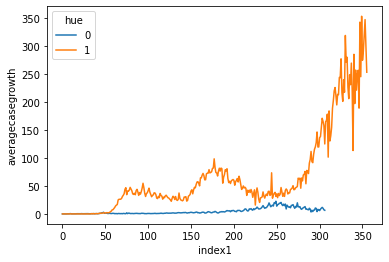

In [161]:
import seaborn as sns

sns.lineplot('index1', 'averagecasegrowth', hue='hue', data=dfhilow)

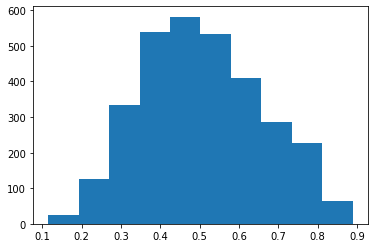

In [162]:
plt.hist(dftest['ALWAYS'])
a = dftest['ALWAYS'] >= .7
b = dftest[a]

x = dftest['ALWAYS'] <= .3
y = dftest[x]

In [163]:
dftimed6.sort_values(by='date', inplace=True)
b = dftimed6['date']



In [164]:
b.drop_duplicates(inplace=True, keep='first')
sio = [x for x in range(len(b))]

In [165]:
b = pd.DataFrame(b)

In [166]:
b['index'] = sio

In [167]:
b.index = b['date']
b.drop(labels = 'date', axis=1)

,index
date,
2020-01-21,0
2020-01-22,1
2020-01-23,2
2020-01-24,3
2020-01-25,4
...,...
2021-01-06,351
2021-01-07,352
2021-01-08,353


In [168]:
ss123 = []
for x in dftimed6['date']:
  y = b.loc[b['date']==x, 'index']
  y = list(y)
  y = y[0]

  ss123.append(y)



In [169]:
len(ss123)

188999

In [170]:
dftimed6['index2'] = ss123

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


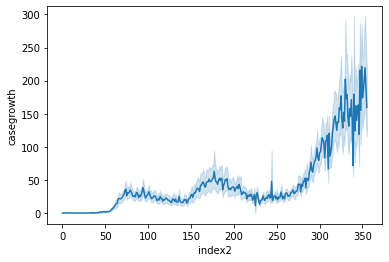

In [171]:
sns.lineplot('index2', 'casegrowth', data=dftimed6)

In [172]:
ss123 = []
for x in dftimed111['date']:
  y = b.loc[b['date']==x, 'index']
  y = list(y)
  y = y[0]

  ss123.append(y)
dftimed111['index2'] = ss123


In [173]:
dftimed111['hue'] = 2

In [174]:
dftimed111.head()

,date,county,state,fips,cases,deaths,CTYNAME,casegrowth,index2,hue
0,2020-01-21,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,0,2
1,2020-01-22,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,1,2
2,2020-01-23,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,2,2
3,2020-01-24,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,3,2
4,2020-01-25,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,4,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


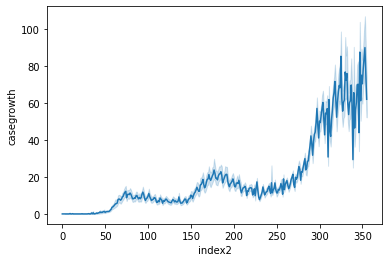

In [175]:
sns.lineplot('index2', 'casegrowth', data=dftimed111)


In [176]:
dftimedfinal = pd.concat([dftimed6, dftimed111], ignore_index=True)

In [177]:
dftimedfinal.rename(columns={'index2':'Day', 'casegrowth':'Case Growth', 'hue':'Care_index'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


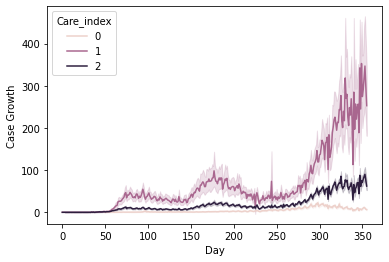

In [178]:
sns.lineplot('Day', 'Case Growth', hue='Care_index', data=dftimedfinal);

In [179]:
a = dftimedfinal['Care_index'] == 0
b = dftimedfinal['Care_index'] == 1
c = dftimedfinal['Care_index'] == 2

a = dftimedfinal[a]
b = dftimedfinal[b]
c = dftimedfinal[c]

In [180]:
a.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


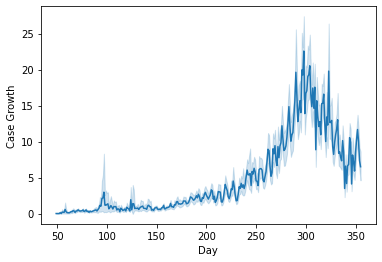

In [181]:
sns.lineplot('Day', 'Case Growth', data=a);

In [182]:
b.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


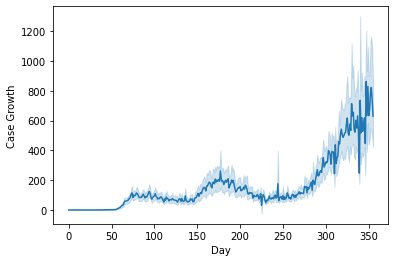

In [94]:
sns.lineplot('Day', 'Case Growth', data=b);


In [95]:
c.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


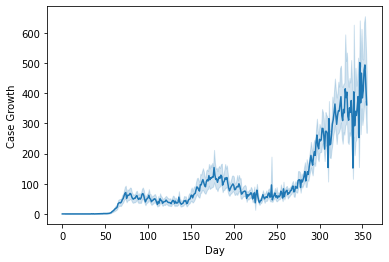

In [96]:
sns.lineplot('Day', 'Case Growth', data=c);
#This visualiztion is the daily Growth rate for the entire United States
